<a href="https://colab.research.google.com/github/SK124/Sign-Alphabet-Classifier-/blob/master/ASL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
#os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/"
os.environ['KAGGLE_USERNAME'] = "creganestark" # username from the json file
os.environ['KAGGLE_KEY'] = "982492aa45d6ead218a39a88af53c927" # your key from json file

In [9]:
!kaggle datasets download -d grassknoted/asl-alphabet

 99% 1.02G/1.03G [00:24<00:00, 43.0MB/s]
100% 1.03G/1.03G [00:24<00:00, 44.8MB/s]


In [10]:
!unzip /content/asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing191.jpg  
  inflating: asl_alphabet_t

In [11]:
!ls /content/asl_alphabet_train/asl_alphabet_train

A  C  del  F  H  J  L  N	O  Q  S      T	V  X  Z
B  D  E    G  I  K  M  nothing	P  R  space  U	W  Y


In [0]:
import cv2
from glob import glob
from matplotlib import pyplot as plt
from numpy import floor
import random

In [0]:
def img_view(letter):
  print("Samples images for letter " + letter)
  root_path='/content/asl_alphabet_train/asl_alphabet_train/'
  img_path=root_path+letter+'/**'
  #images=glob(r'/content/asl_alphabet_train/asl_alphabet_train/A**')
  images =glob(img_path)
  plt.figure(figsize=(16,16))
  img=random.sample(images,3)
  plt.subplot(131)
  plt.imshow(cv2.imread(img[0]))
  plt.subplot(132)
  plt.imshow(cv2.imread(img[1]))
  plt.subplot(133)
  plt.imshow(cv2.imread(img[2]))
  return

Samples images for letter X


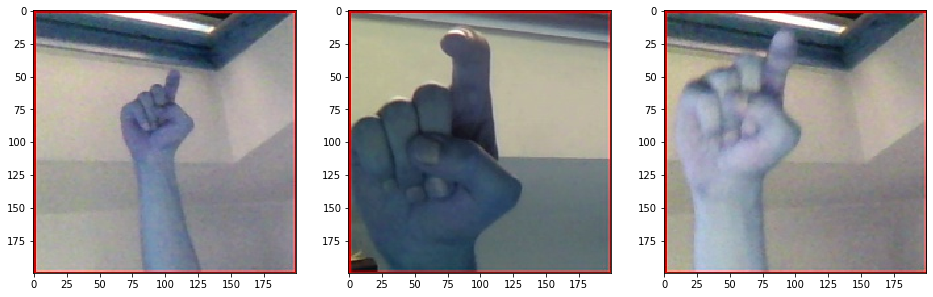

In [16]:
img_view('X')

CUSTOM CNN

In [17]:
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
print(os.listdir("../content"))

Using TensorFlow backend.


['.config', 'asl_alphabet_train', 'asl-alphabet.zip', 'asl_alphabet_test', 'sample_data']


In [0]:
train_dir = '../content/asl_alphabet_train/asl_alphabet_train'
test_dir = '../content/asl_alphabet_test/asl_alphabet_test'

In [0]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27,'nothing':28}

In [0]:
def load_data():
  #Loads data an preprocesses it,returns train an test data along with labels
  images=[]
  labels=[]
  size=(64,64)
  print('Loaing Data from File ',end='')
  for folder in os.listdir(train_dir):
    print(folder,end='|')
    path=train_dir+'/'+folder
    for image in os.listdir(path):
      temp_img=cv2.imread(path+'/'+image)
      temp_img=cv2.resize(temp_img,size)
      images.append(temp_img)
      labels.append(labels_dict[folder])

  images=np.array(images)
  images=images.astype('float32')/255.0
  labels=keras.utils.to_categorical(labels)
  X_train,X_test,y_train,y_test=train_test_split(images,labels,test_size=0.05)

  print()
  print('Loaded',len(X_train),' images for training','Train data shape ',X_train.shape)
  print('Loaded',len(X_test),' images for testing','Test data shape ',X_test.shape)

  return X_train,X_test,y_train,y_test

In [21]:
X_train, X_test, y_train, y_test = load_data()

Loaing Data from File Z|S|L|F|N|Q|R|A|O|J|M|del|U|G|nothing|X|Y|T|K|space|C|H|W|B|D|E|P|V|I|
Loaded 82650  images for training Train data shape  (82650, 64, 64, 3)
Loaded 4350  images for testing Test data shape  (4350, 64, 64, 3)


In [0]:
def create_model():
    model=Sequential()
    model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(Dense(29, activation = 'softmax'))
    model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
    
    print('Model Created')
    model.summary()
    return model

def fit_model():
  model_hist=model.fit(X_train,y_train,batch_size=64,epochs=5,validation_split=0.1)
  return model_hist

In [23]:
model=create_model()
curr_model_hist=fit_model()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model Created
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 6

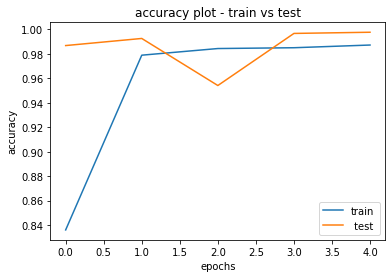

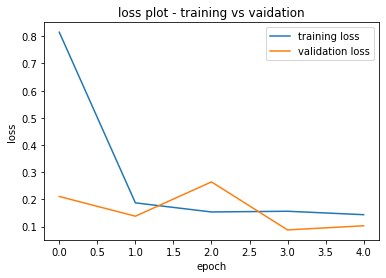

In [24]:
plt.plot(curr_model_hist.history['acc'])
plt.plot(curr_model_hist.history['val_acc'])
plt.title('accuracy plot - train vs test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train' ,' test '])
plt.show()

plt.plot(curr_model_hist.history['loss'])
plt.plot(curr_model_hist.history['val_loss'])
plt.legend(['training loss', 'validation loss'])
plt.title('loss plot - training vs vaidation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [25]:
evaluate_metrics=model.evaluate(X_test,y_test)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluatation Loss = ","{:.6f}%".format(evaluate_metrics[0]))

4350/4350 [==============================] - 1s 221us/step

Evaluation Accuracy =  99.77% 
Evaluatation Loss =  0.103229%


In [0]:
def load_test_data():
  images=[]
  names=[]
  size=64,64
  for image in os.listdir(test_dir):
    temp=cv2.imread(test_dir+'/'+image)
    temp=cv2.resize(temp,size)
    images.append(temp)
    names.append(image)
  images=np.array(images)
  images=images.astype('float32')/255.0
  return images,names


In [0]:
test_image,test_img_names=load_test_data()

In [0]:
# make predictions on an image and append it to the list (predictions).
predictions = [model.predict_classes(image.reshape(1,64,64,3))[0] for image in test_image]

In [0]:
def get_prediction_labels(predictions):
  prediction_labels=[]
  for i in range(len(predictions)):
    for ins in labels_dict:
      if predictions[i]==labels_dict[ins]:
        prediction_labels.append(ins)
        break
  return prediction_labels


In [0]:
predictions_labels_plot=get_prediction_labels(predictions)

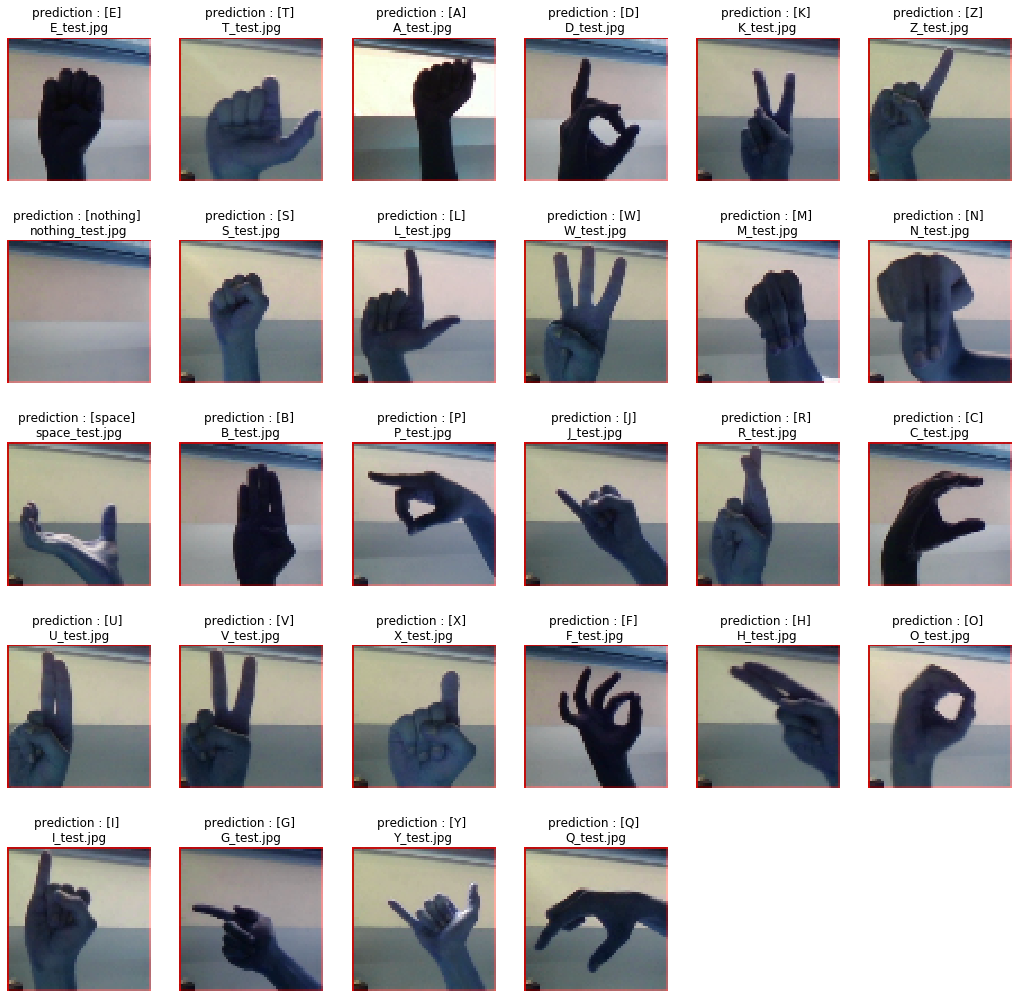

In [37]:
predfigure = plt.figure(figsize = (18,18))
def plot_image_1(fig, image, label, prediction, predictions_label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    title = "prediction : [" + str(predictions_label) + "] "+ "\n" + label
    plt.title(title)
    return

image_index = 0
row = 5
col = 6
for i in range(1,(row*col-1)):
    plot_image_1(predfigure, test_image[image_index], test_img_names[image_index], predictions[image_index], predictions_labels_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

SEPERABLE CONVOLUTION

In [0]:
from keras.layers import Conv2D, Dense, Dropout, Flatten, Input, Add, GlobalAveragePooling2D, DepthwiseConv2D, BatchNormalization, LeakyReLU
from keras.models import Model
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 29

In [0]:
train_image_generator = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)


val_image_generator = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
)

train_generator = train_image_generator.flow(x=X_train, y=y_train, batch_size=batch_size, shuffle=True)
val_generator = val_image_generator.flow(x=X_test, y=y_test, batch_size=batch_size, shuffle=False)

In [40]:
inputs = Input(shape=target_dims)
net = Conv2D(64, kernel_size=3, strides=1, padding="same")(inputs)
net = LeakyReLU()(net)
net = Conv2D(64, kernel_size=3, strides=1, padding="same")(net)
net = LeakyReLU()(net)
net = Conv2D(64, kernel_size=3, strides=2, padding="same")(net)
net = LeakyReLU()(net)

net = Conv2D(64, kernel_size=3, strides=1, padding="same")(net)
net = LeakyReLU()(net)
net = Conv2D(64, kernel_size=3, strides=1, padding="same")(net)
net = LeakyReLU()(net)
net = Conv2D(128, kernel_size=3, strides=2, padding="same")(net)
net = LeakyReLU()(net)

shortcut = net

net = DepthwiseConv2D(kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(net)
net = BatchNormalization(axis=3)(net)
net = LeakyReLU()(net)
net = Conv2D(filters=128, kernel_size=1, strides=1, padding='same', kernel_initializer='he_normal')(net)
net = BatchNormalization(axis=3)(net)
net = LeakyReLU()(net)
net = DepthwiseConv2D(kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(net)
net = BatchNormalization(axis=3)(net)
net = LeakyReLU()(net)
net = Conv2D(filters=128, kernel_size=1, strides=1, padding='same', kernel_initializer='he_normal')(net)
net = BatchNormalization(axis=3)(net)
net = LeakyReLU()(net)

net = Add()([net, shortcut])

net = GlobalAveragePooling2D()(net)
net = Dropout(0.2)(net)

net = Dense(256, activation='relu')(net)
outputs = Dense(num_classes, activation='softmax')(net)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 64, 64, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 64, 64, 64)   0           conv2d_7[0][0]                   
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 64, 64, 64)   36928       leaky_re_lu_1[0][0]              
___________________________________________________________________________________________

In [41]:
import datetime
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
model.fit_generator(train_generator,epochs=5,validation_data=val_generator,steps_per_epoch=train_generator.__len__(),validation_steps=val_generator.__len__(),
                     callbacks=[ReduceLROnPlateau(monitor='val_acc',factor=0.2,patience=5,verbose=1,mode='auto')])

Epoch 1/5
1292/1292 [==============================] - 136s 105ms/step - loss: 1.2034 - acc: 0.6188 - val_loss: 0.4419 - val_acc: 0.8549
Epoch 2/5
1292/1292 [==============================] - 133s 103ms/step - loss: 0.3205 - acc: 0.8930 - val_loss: 0.1304 - val_acc: 0.9531
Epoch 3/5
1292/1292 [==============================] - 134s 104ms/step - loss: 0.2073 - acc: 0.9318 - val_loss: 0.1966 - val_acc: 0.9271
Epoch 4/5
1292/1292 [==============================] - 133s 103ms/step - loss: 0.1547 - acc: 0.9485 - val_loss: 0.2286 - val_acc: 0.9255
Epoch 5/5
1292/1292 [==============================] - 133s 103ms/step - loss: 0.1330 - acc: 0.9563 - val_loss: 0.1102 - val_acc: 0.9667


In [42]:
inputs = Input(shape=target_dims)
net = Conv2D(32, kernel_size=3, strides=1, padding="same")(inputs)
net = LeakyReLU()(net)
net = Conv2D(32, kernel_size=3, strides=1, padding="same")(net)
net = LeakyReLU()(net)
net = Conv2D(32, kernel_size=3, strides=2, padding="same")(net)
net = LeakyReLU()(net)

net = Conv2D(32, kernel_size=3, strides=1, padding="same")(net)
net = LeakyReLU()(net)
net = Conv2D(32, kernel_size=3, strides=1, padding="same")(net)
net = LeakyReLU()(net)
net = Conv2D(32, kernel_size=3, strides=2, padding="same")(net)
net = LeakyReLU()(net)

shortcut = net

net = DepthwiseConv2D(kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(net)
net = BatchNormalization(axis=3)(net)
net = LeakyReLU()(net)
net = Conv2D(filters=32, kernel_size=1, strides=1, padding='same', kernel_initializer='he_normal')(net)
net = BatchNormalization(axis=3)(net)
net = LeakyReLU()(net)
net = DepthwiseConv2D(kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(net)
net = BatchNormalization(axis=3)(net)
net = LeakyReLU()(net)
net = Conv2D(filters=32, kernel_size=1, strides=1, padding='same', kernel_initializer='he_normal')(net)
net = BatchNormalization(axis=3)(net)
net = LeakyReLU()(net)

net = Add()([net, shortcut])

net = GlobalAveragePooling2D()(net)
net = Dropout(0.2)(net)

net = Dense(128, activation='relu')(net)
outputs = Dense(num_classes, activation='softmax')(net)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 64, 64, 32)   896         input_2[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_11 (LeakyReLU)      (None, 64, 64, 32)   0           conv2d_15[0][0]                  
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 64, 64, 32)   9248        leaky_re_lu_11[0][0]             
____________________________________________________________________________________________

In [43]:
import datetime
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
model.fit_generator(train_generator,epochs=5,validation_data=val_generator,steps_per_epoch=train_generator.__len__(),validation_steps=val_generator.__len__(),
                     callbacks=[ReduceLROnPlateau(monitor='val_acc',factor=0.2,patience=5,verbose=1,mode='auto')])

Epoch 1/5
1292/1292 [==============================] - 114s 88ms/step - loss: 1.9511 - acc: 0.3864 - val_loss: 0.8208 - val_acc: 0.7060
Epoch 2/5
1292/1292 [==============================] - 112s 87ms/step - loss: 0.8384 - acc: 0.7128 - val_loss: 0.5551 - val_acc: 0.8202
Epoch 3/5
1292/1292 [==============================] - 113s 87ms/step - loss: 0.5708 - acc: 0.8046 - val_loss: 0.4246 - val_acc: 0.8513
Epoch 4/5
1292/1292 [==============================] - 112s 87ms/step - loss: 0.4430 - acc: 0.8494 - val_loss: 0.1502 - val_acc: 0.9483
Epoch 5/5
1292/1292 [==============================] - 112s 86ms/step - loss: 0.3724 - acc: 0.8747 - val_loss: 0.1747 - val_acc: 0.9428
